In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
import datetime
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

# 1. Load dữ liệu

In [2]:
df = pd.read_csv('World Energy Consumption.csv')

df = df[['iso_code','country','year','carbon_intensity_elec','coal_production','electricity_generation','biofuel_electricity',
       'coal_electricity','fossil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','oil_electricity',
        'renewables_electricity','solar_electricity','wind_electricity','energy_per_gdp','energy_per_capita','fossil_share_elec',
        'gas_share_elec','gas_production','low_carbon_share_elec','oil_production','population','gdp']]

In [3]:
df_2000 = df[df['year']>2000]

In [4]:
nulls=df_2000.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        df_2000[i].fillna(method = 'ffill',inplace=True)
        df_2000[i].fillna(method = 'bfill',inplace=True)

C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [5]:
df_2000.head()

,iso_code,country,year,carbon_intensity_elec,coal_production,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,...,wind_electricity,energy_per_gdp,energy_per_capita,fossil_share_elec,gas_share_elec,gas_production,low_carbon_share_elec,oil_production,population,gdp
101,AFG,Afghanistan,2001,176.0,0.151,0.592,0.0,0.0,0.094,0.094,...,0.0,0.288,207.409,15.878,15.878,1396.444,84.122,4271.282,21606992.0,1.557484e+10
102,AFG,Afghanistan,2002,176.0,0.122,0.687,0.0,0.0,0.132,0.132,...,0.0,0.166,188.554,19.214,19.214,1396.444,80.786,4271.282,22600774.0,2.567680e+10
103,AFG,Afghanistan,2003,176.0,0.203,0.939,0.0,0.0,0.309,0.309,...,0.0,0.181,212.873,32.907,32.907,1396.444,67.093,4271.282,23680871.0,2.780556e+10
104,AFG,Afghanistan,2004,176.0,0.197,0.894,0.0,0.0,0.329,0.329,...,0.0,0.164,188.813,36.801,36.801,1396.444,63.199,4271.282,24726689.0,2.844769e+10
105,AFG,Afghanistan,2005,176.0,0.192,0.934,0.0,0.0,0.344,0.344,...,0.0,0.192,234.226,36.831,36.831,1396.444,63.169,4271.282,25654274.0,3.125965e+10


In [6]:
df_2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4649 entries, 101 to 17469
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   iso_code                4649 non-null   object 
 1   country                 4649 non-null   object 
 2   year                    4649 non-null   int64  
 3   carbon_intensity_elec   4649 non-null   float64
 4   coal_production         4649 non-null   float64
 5   electricity_generation  4649 non-null   float64
 6   biofuel_electricity     4649 non-null   float64
 7   coal_electricity        4649 non-null   float64
 8   fossil_electricity      4649 non-null   float64
 9   gas_electricity         4649 non-null   float64
 10  hydro_electricity       4649 non-null   float64
 11  nuclear_electricity     4649 non-null   float64
 12  oil_electricity         4649 non-null   float64
 13  renewables_electricity  4649 non-null   float64
 14  solar_electricity       4649 non-null

In [7]:
df_world = df_2000[['iso_code','country','year','carbon_intensity_elec','electricity_generation','energy_per_gdp',
    'energy_per_capita','population','gdp']]
# df_world_1 = df_world[df_world['year']>2019]
df_world

,iso_code,country,year,carbon_intensity_elec,electricity_generation,energy_per_gdp,energy_per_capita,population,gdp
101,AFG,Afghanistan,2001,176.0,0.592,0.288,207.409,21606992.0,1.557484e+10
102,AFG,Afghanistan,2002,176.0,0.687,0.166,188.554,22600774.0,2.567680e+10
103,AFG,Afghanistan,2003,176.0,0.939,0.181,212.873,23680871.0,2.780556e+10
104,AFG,Afghanistan,2004,176.0,0.894,0.164,188.813,24726689.0,2.844769e+10
105,AFG,Afghanistan,2005,176.0,0.934,0.192,234.226,25654274.0,3.125965e+10
...,...,...,...,...,...,...,...,...,...
17465,ZWE,Zimbabwe,2015,209.0,9.388,2.223,4027.628,13814642.0,2.503057e+10
17466,ZWE,Zimbabwe,2016,209.0,6.826,1.889,3385.574,14030338.0,2.515176e+10
17467,ZWE,Zimbabwe,2017,209.0,7.310,1.889,3385.574,14236599.0,2.515176e+10
17468,ZWE,Zimbabwe,2018,209.0,9.133,1.889,3385.574,14438812.0,2.515176e+10


# 2.1 Phân tích trên phạm vi toàn thế giới

In [8]:
data_1 = list(['carbon_intensity_elec','electricity_generation','energy_per_gdp','energy_per_capita','population','gdp'])
wOutput_1 = widgets.Output(layout={'border': '1px solid black'})
w1 = widgets.Select(description='Select data',
                    options=data_1,
                    value='carbon_intensity_elec',
                    row=1, style={'description_width':'initial'})
display(w1)
wButton_1 = widgets.Button(description = 'Draw chart', button_style = 'info',
                               tooltip = 'Click here', icon = 'check')
def Map_world(data_name = data_1):
    with wOutput_1:
        fig = px.scatter_geo(df_world,locations ='iso_code',color ='country',
                    hover_name = 'country', size = data_name,
                     projection = 'natural earth', animation_frame = 'year')
        fig.show()
def Ve_1(click):
    wOutput_1.clear_output()
    with wOutput_1:
        Map_world(w1.value)
wButton_1.on_click(Ve_1)
widgets.VBox([wButton_1,wOutput_1])

Select(description='Select data', options=('carbon_intensity_elec', 'electricity_generation', 'energy_per_gdp'…

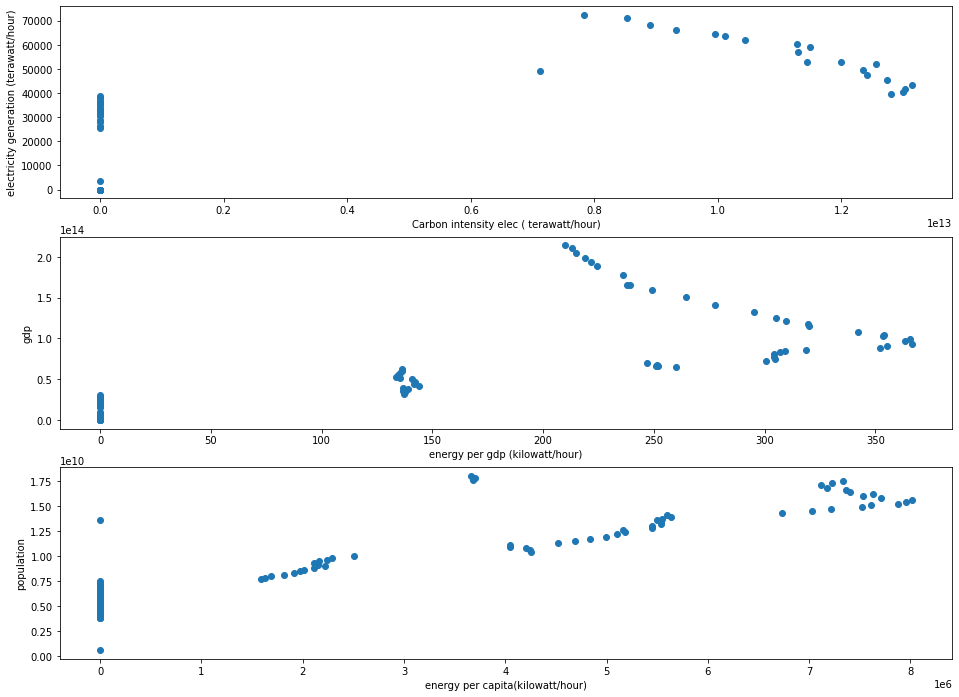

In [9]:
df_1 = df[['year','carbon_intensity_elec','electricity_generation']].groupby('year').sum()
fig = plt.figure(figsize = (16,12))
ax1 = plt.subplot(3,1,1)
ax1.scatter((df_1['carbon_intensity_elec']*1000000000),df_1['electricity_generation'])
ax1.set_xlabel('Carbon intensity elec ( terawatt/hour)')
ax1.set_ylabel('electricity generation (terawatt/hour)')

df_2 = df[['year','energy_per_gdp','gdp']].groupby('year').sum()
ax2 = plt.subplot(3,1,2)
ax2.scatter(df_2['energy_per_gdp'],df_2['gdp'])
ax2.set_xlabel('energy per gdp (kilowatt/hour)')
ax2.set_ylabel('gdp')

df_3 = df[['year','energy_per_capita','population']].groupby('year').sum()
ax3 = plt.subplot(3,1,3)
ax3.scatter(df_3['energy_per_capita'],df_3['population'])
ax3.set_xlabel('energy per capita(kilowatt/hour)')
ax3.set_ylabel('population');

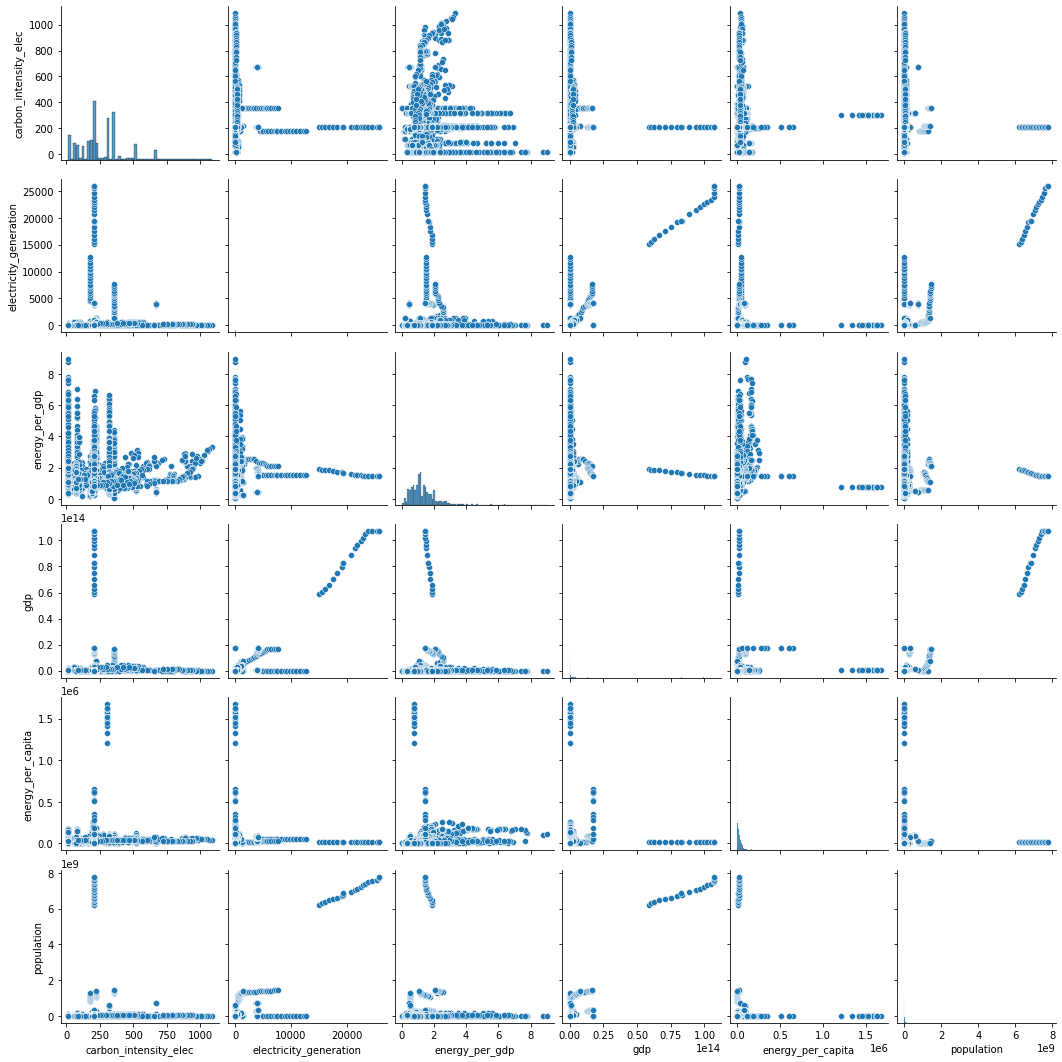

In [10]:
sns.pairplot(df_world[['carbon_intensity_elec','electricity_generation',
                       'energy_per_gdp','gdp','energy_per_capita','population']]);

# 2.2 Phân tích trên phạm vi top 15 nước có dân số lớn nhất thế giới

In [11]:
# df_2000

In [12]:
df_top = df_2000[['iso_code','country','year','biofuel_electricity','coal_electricity','gas_electricity',
            'hydro_electricity','nuclear_electricity','oil_electricity','solar_electricity','wind_electricity' ,'population']]
df_top

,iso_code,country,year,biofuel_electricity,coal_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,solar_electricity,wind_electricity,population
101,AFG,Afghanistan,2001,0.000,0.000,0.094,0.498,0.0,0.0,0.000,0.0,21606992.0
102,AFG,Afghanistan,2002,0.000,0.000,0.132,0.555,0.0,0.0,0.000,0.0,22600774.0
103,AFG,Afghanistan,2003,0.000,0.000,0.309,0.630,0.0,0.0,0.000,0.0,23680871.0
104,AFG,Afghanistan,2004,0.000,0.000,0.329,0.565,0.0,0.0,0.000,0.0,24726689.0
105,AFG,Afghanistan,2005,0.000,0.000,0.344,0.590,0.0,0.0,0.000,0.0,25654274.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17465,ZWE,Zimbabwe,2015,0.128,4.312,0.000,4.940,0.0,0.0,0.008,0.0,13814642.0
17466,ZWE,Zimbabwe,2016,0.147,3.715,0.000,2.955,0.0,0.0,0.009,0.0,14030338.0
17467,ZWE,Zimbabwe,2017,0.151,3.219,0.000,3.929,0.0,0.0,0.011,0.0,14236599.0
17468,ZWE,Zimbabwe,2018,0.187,3.932,0.000,5.000,0.0,0.0,0.014,0.0,14438812.0


In [13]:
df_tam = df_top[['population','country']].groupby('country').sum().sort_values('population',ascending = False).reset_index()
# df_top
df_tam.head(30)

,country,population
0,World,1.400117e+11
1,China,2.743831e+10
2,India,2.472337e+10
3,Africa,1.996657e+10
4,Europe (other),1.421925e+10
5,Europe,1.401054e+10
6,North America,1.028180e+10
7,United States,6.183068e+09
8,United States Pacific Islands,5.296042e+09
9,Indonesia,4.602675e+09


In [14]:
name_top_15 = df_tam.head(16)
list_name_top = name_top_15['country'][1:]
list_name_top

1                             China
2                             India
3                            Africa
4                    Europe (other)
5                            Europe
6                     North America
7                     United States
8     United States Pacific Islands
9                         Indonesia
10                           Brazil
11                         Pakistan
12                          Nigeria
13                       Bangladesh
14                           Russia
15                            Japan
Name: country, dtype: object

In [15]:
df_top_15 = df_top[(df_top['country'].isin(['China','India','Africa','Europe (other)','Europe','North America',
                                         'United States','United States Pacific Islands','Indonesia','Brazil','Pakistan',
                                         'Nigeria','Bangladesh','Russia','Japan']))].reset_index()
df_top_15

,index,iso_code,country,year,biofuel_electricity,coal_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,solar_electricity,wind_electricity,population
0,221,AFG,Africa,2001,0.000,214.431,100.976,80.864,10.719,47.139,0.016,0.416,830902539.0
1,222,AFG,Africa,2002,0.000,222.898,115.952,85.181,11.991,46.410,0.019,0.445,851298437.0
2,223,AFG,Africa,2003,0.000,235.015,123.976,82.873,12.663,47.871,0.023,0.541,872248336.0
3,224,AFG,Africa,2004,0.000,245.195,138.154,87.405,13.365,48.735,0.027,0.769,893842786.0
4,225,AFG,Africa,2005,0.000,248.812,152.749,89.066,11.293,50.775,0.032,0.782,916154285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,16440,USA,United States Pacific Islands,2012,56.055,773.806,1629.237,285.790,789.919,28.947,132.630,336.533,331002647.0
287,16441,USA,United States Pacific Islands,2013,56.055,773.806,1629.237,285.790,789.919,28.947,132.630,336.533,331002647.0
288,16442,USA,United States Pacific Islands,2014,56.055,773.806,1629.237,285.790,789.919,28.947,132.630,336.533,331002647.0
289,16443,USA,United States Pacific Islands,2015,56.055,773.806,1629.237,285.790,789.919,28.947,132.630,336.533,331002647.0


In [16]:
data_2 = list(['biofuel_electricity','coal_electricity','gas_electricity','hydro_electricity','nuclear_electricity',
               'oil_electricity','solar_electricity','wind_electricity'])
wOutput_2 = widgets.Output(layout={'border': '1px solid black'})
w2 = widgets.Select(description='Select data',
                    options=data_2,
                    value='biofuel_electricity',
                    row=1, style={'description_width':'initial'})
display(w2)
wButton_2 = widgets.Button(description = 'Draw chart', button_style = 'info',
                               tooltip = 'Click here', icon = 'check')
def Map_top(data_name = data_2):
    with wOutput_2:
        df_top_15_new = px.data.gapminder()
        fig = px.bar(df_top_15, x = 'iso_code',y=data_name, color = 'iso_code', animation_frame='year',animation_group = 'iso_code')
        fig.show()
def Ve_2(click):
    wOutput_2.clear_output()
    with wOutput_2:
        Map_top(w2.value)
wButton_2.on_click(Ve_2)
widgets.VBox([wButton_2,wOutput_2])

Select(description='Select data', options=('biofuel_electricity', 'coal_electricity', 'gas_electricity', 'hydr…

<ipython-input-17-514c5301dd9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000['total']=df_2000[Parse].sum(axis=1)
<ipython-input-17-514c5301dd9c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Electricity[f"{i}%"]=round(100*(df_2000[i]/df_2000['total']),4)
C:\Users\ADMIN\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

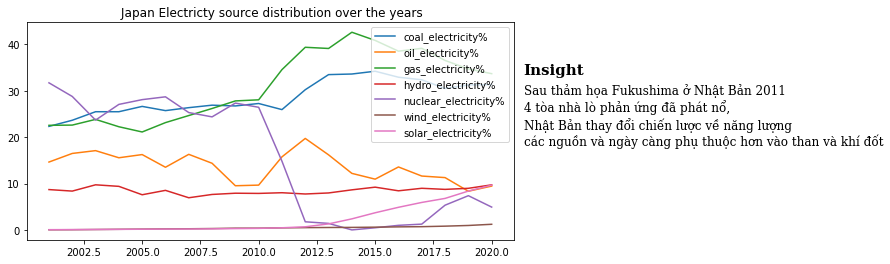

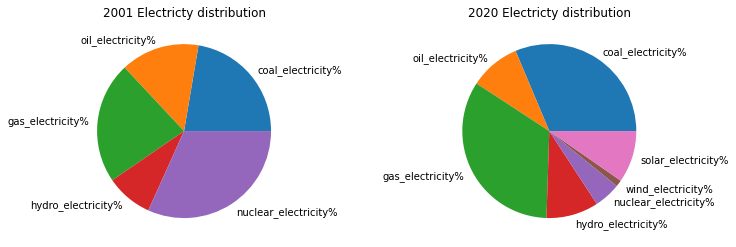

In [17]:
Parse=['coal_electricity','oil_electricity','gas_electricity','hydro_electricity','nuclear_electricity','wind_electricity','solar_electricity']
df_2000['total']=df_2000[Parse].sum(axis=1)
DF_Electricity=df_2000[['year','country']]
for i in Parse:
    DF_Electricity[f"{i}%"]=round(100*(df_2000[i]/df_2000['total']),4)
fig, ax = plt.subplots(1, 2, figsize=(12, 4),gridspec_kw={'width_ratios':[4,1]})
chart_DF=DF_Electricity[DF_Electricity['country']=='Japan'].groupby('year').mean()
ax[0].plot(chart_DF,label=chart_DF.columns)
ax[0].set_title(" Japan Electricty source distribution over the years")
ax[0].legend()
ax[1].axis('off')
fig.text(0.7, 0.7, 'Insight', fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.7, 0.4, '''
Sau thảm họa Fukushima ở Nhật Bản 2011
4 tòa nhà lò phản ứng đã phát nổ,
Nhật Bản thay đổi chiến lược về năng lượng
các nguồn và ngày càng phụ thuộc hơn vào than và khí đốt
''' , fontsize=12, fontweight='light', fontfamily='serif')
    

years=[2001,2020]
count=0
fig2,ay =  plt.subplots(1, 2, figsize=(12, 4))
for y in years:
    chart_DF_pie_1=chart_DF[(chart_DF.index.values==y)]
    for i in chart_DF_pie_1.columns:
        if chart_DF_pie_1.iloc[0][i]<1:
            chart_DF_pie_1.drop(columns=[i],axis=1,inplace=True)
    ay[count].pie(chart_DF_pie_1.iloc[0].values,labels=chart_DF_pie_1.columns)
    ay[count].set_title(f"{int(y)} Electricty distribution")
    count=count+1

plt.show()